In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections
import pydotplus

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,  DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from graphviz import Source

In [2]:
pokedex = pd.read_csv('PokemonDB.csv')
pokedex

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


In [3]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [4]:
colors = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD',
}

#### Histograma de Tipos de Pokemon ####

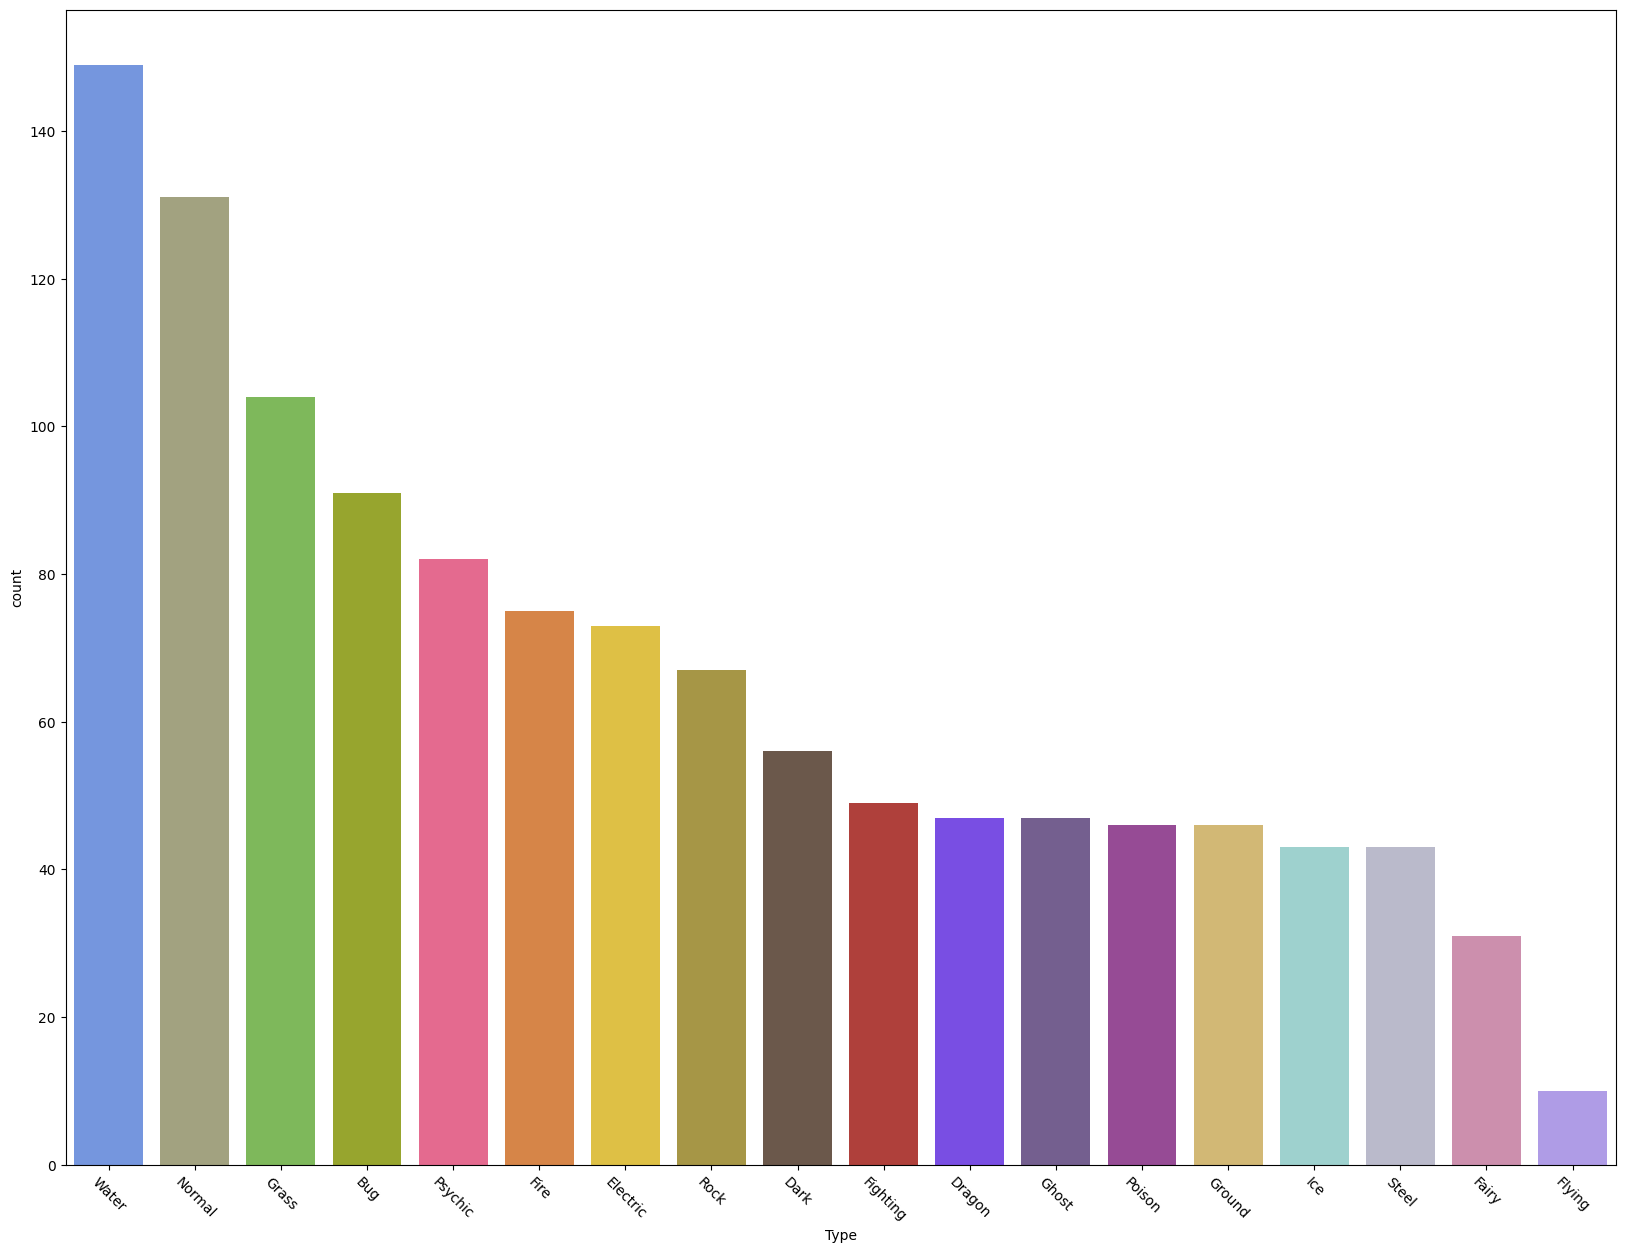

In [5]:


plt.figure(figsize=(20, 15))
sns.countplot(x='Type', data=pokedex, palette=colors, order=pokedex['Type'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

Se nota una distribución dispar entre los tipos de pokemon, siendo los más comunes los de tipo agua, normal y hierba. Por otro lado, los tipos más raros son los de tipo acero, hada y volador. Esto indica que el dataset no está nivelado.

## Análisis de estadísticas ##

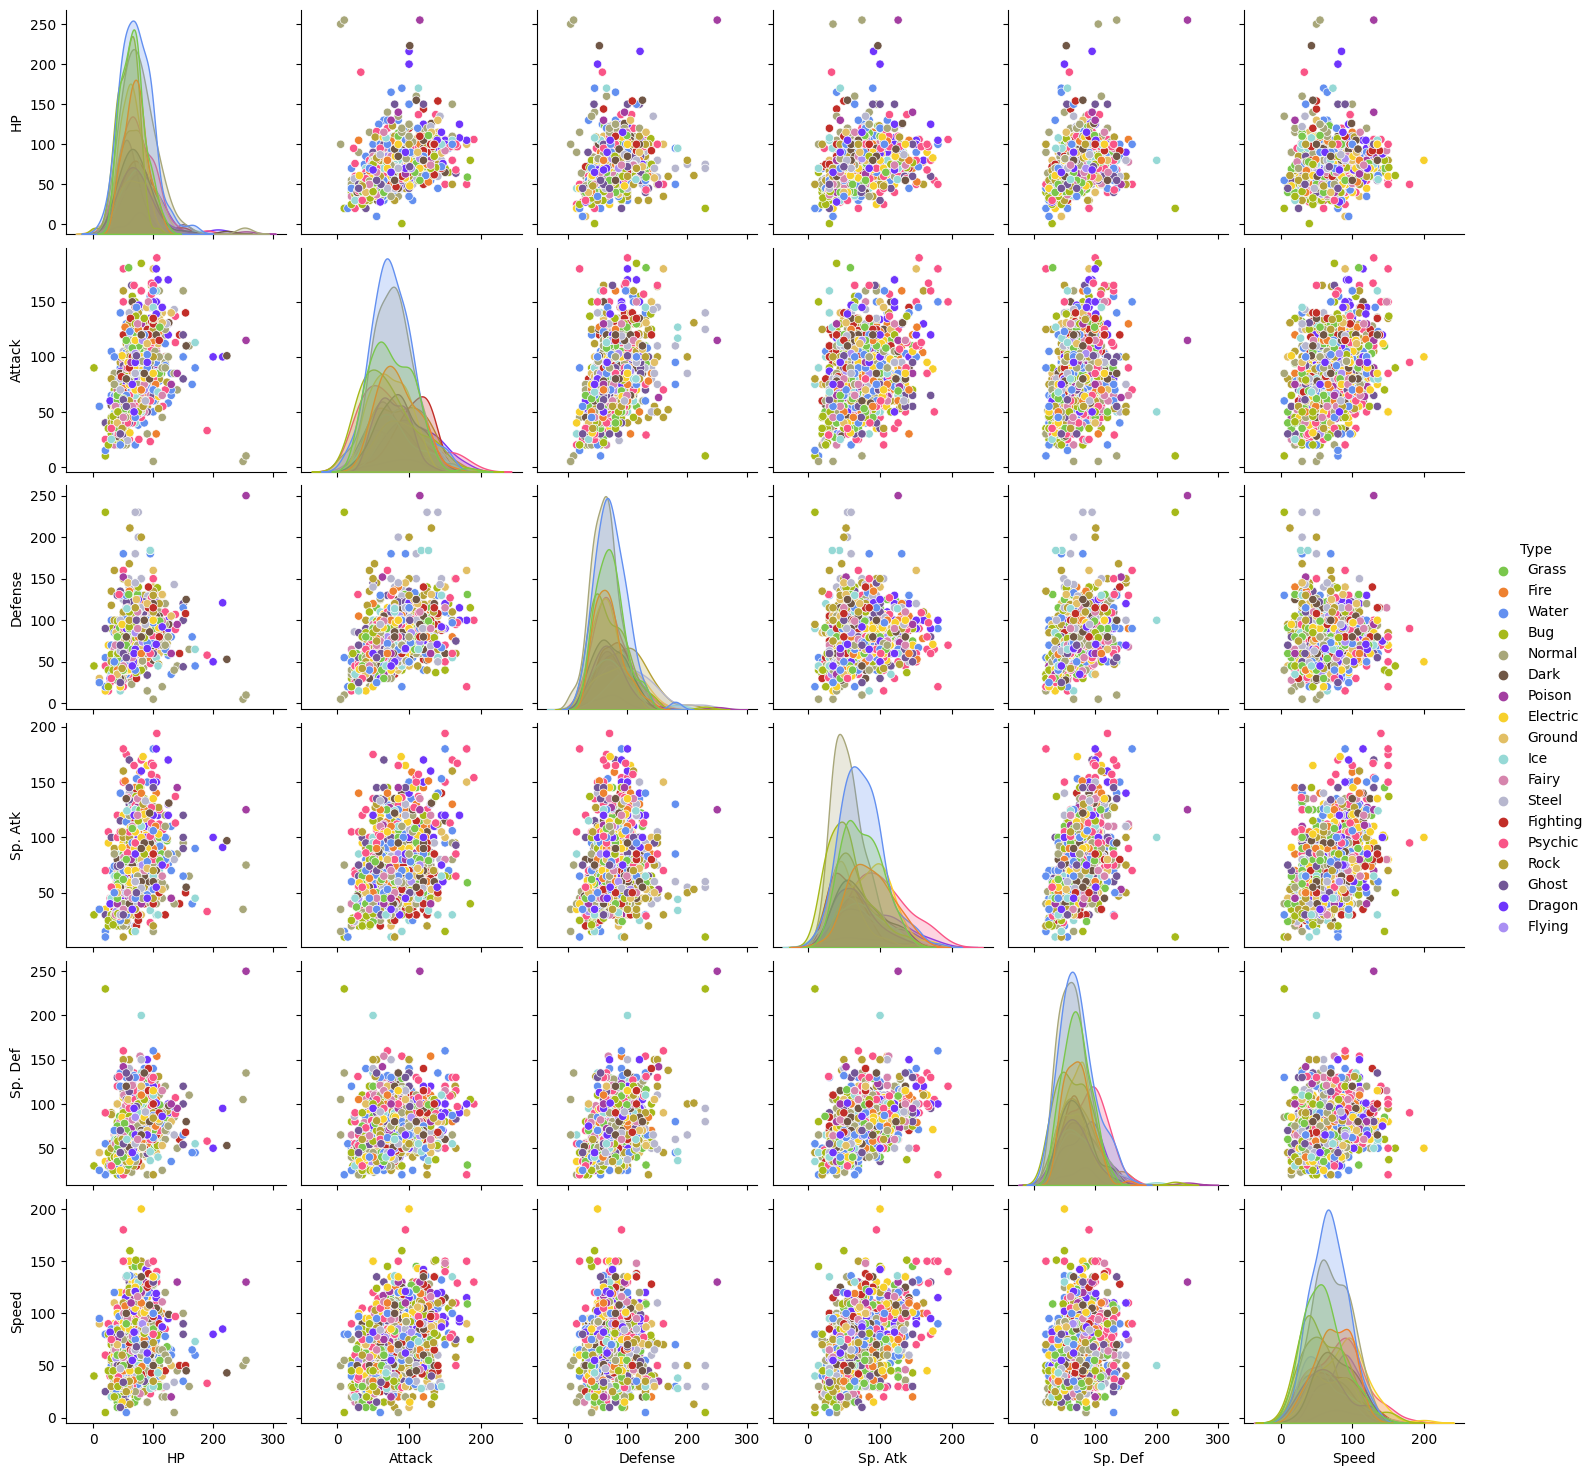

In [6]:
sns.pairplot(pokedex, hue="Type", palette=colors)

### HP ###

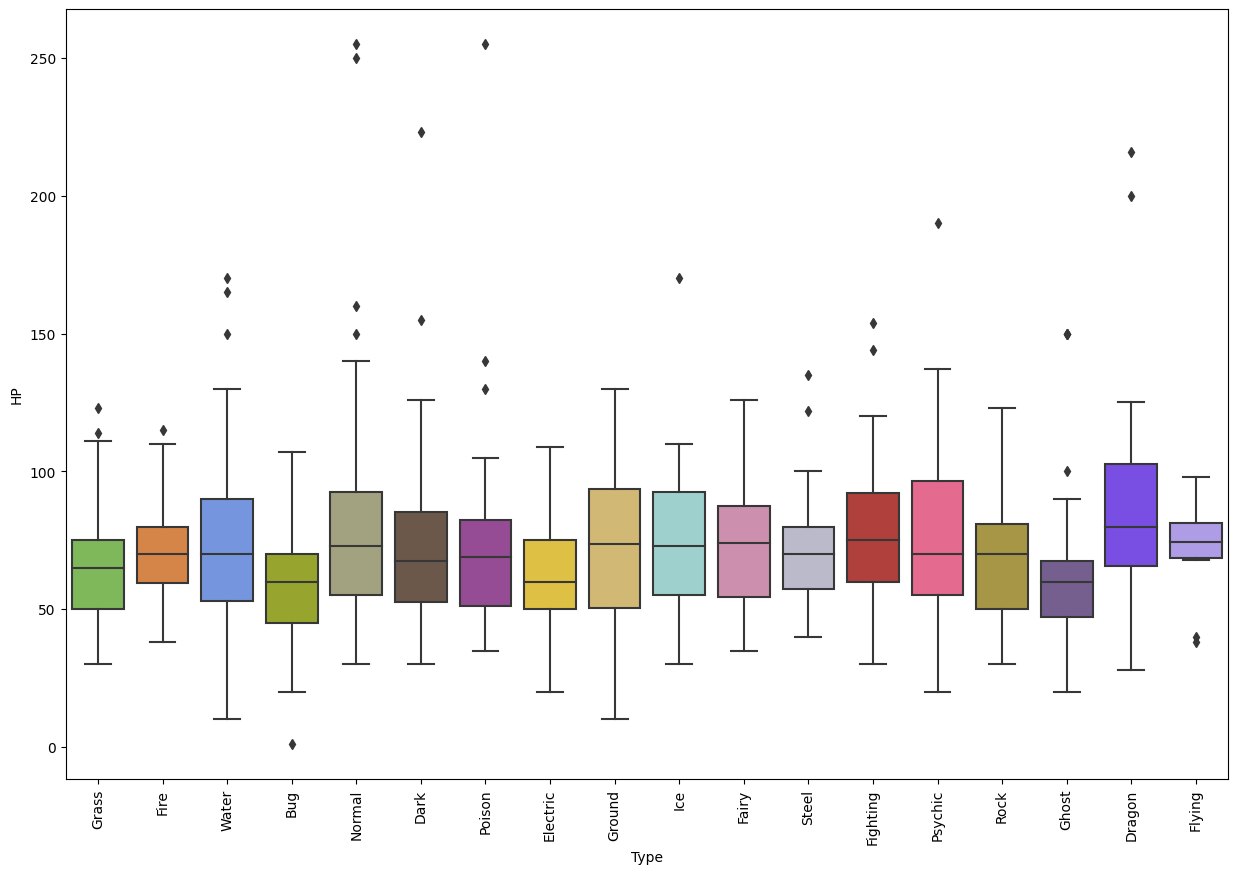

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Type', y='HP', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()

Los pokemon de tipo dragon son aquellos con un HP mas alto lo que indica que son los que mas puntos de vida presentan. Por otro lado, los pokemon de tipo bicho y tipo fantasma son los que tienen un HP más bajo, lo que indica que son los que menos puntos tienen.

### Ataque ###

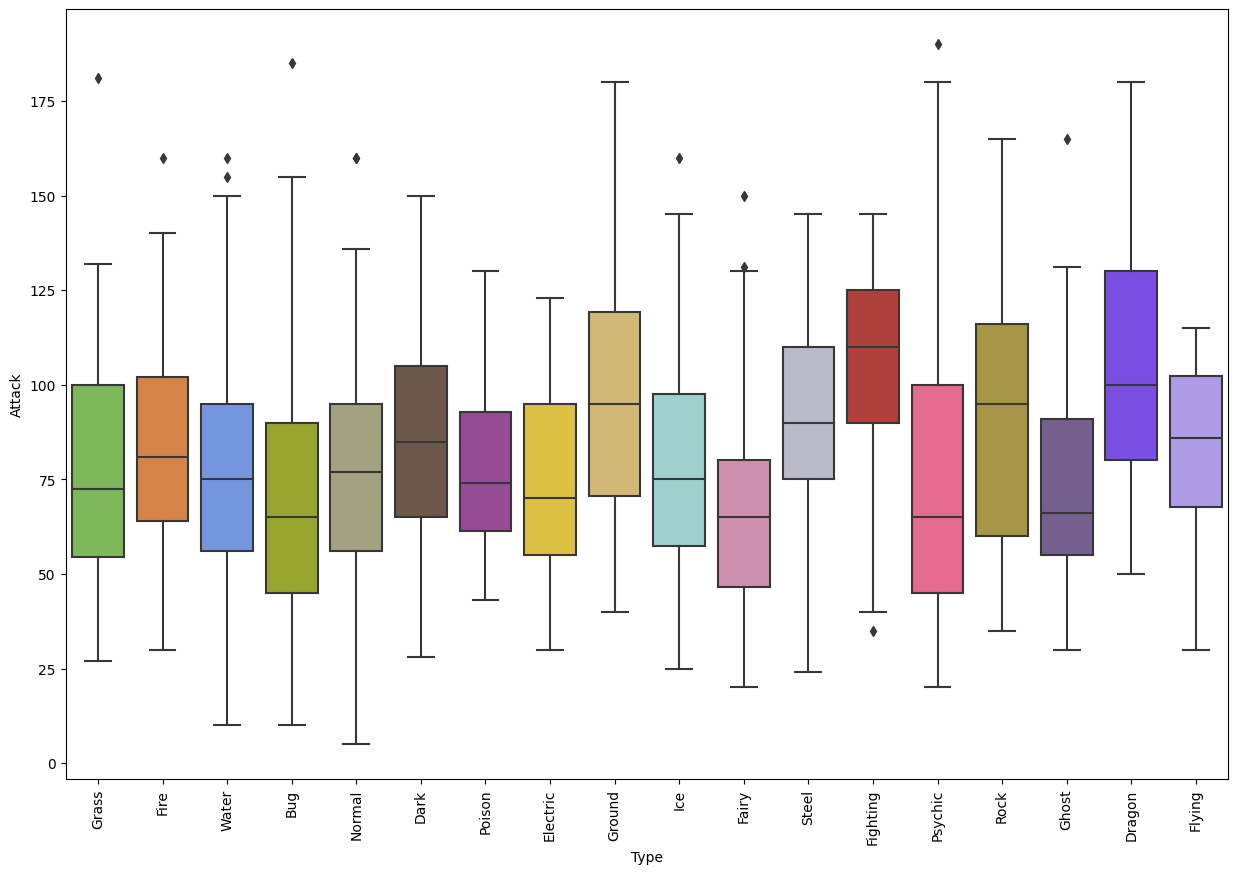

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Type', y='Attack', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()

Los pokemon de tipo dragon y tipo lucha son aquellos con un ataque más alto, lo que indica que son los más fuertes. Por otro lado, los pokemon de tipo bicho, fantasma y hada son los que tienen un ataque más bajo, lo que indica que son los más débiles.

### Defensa ###

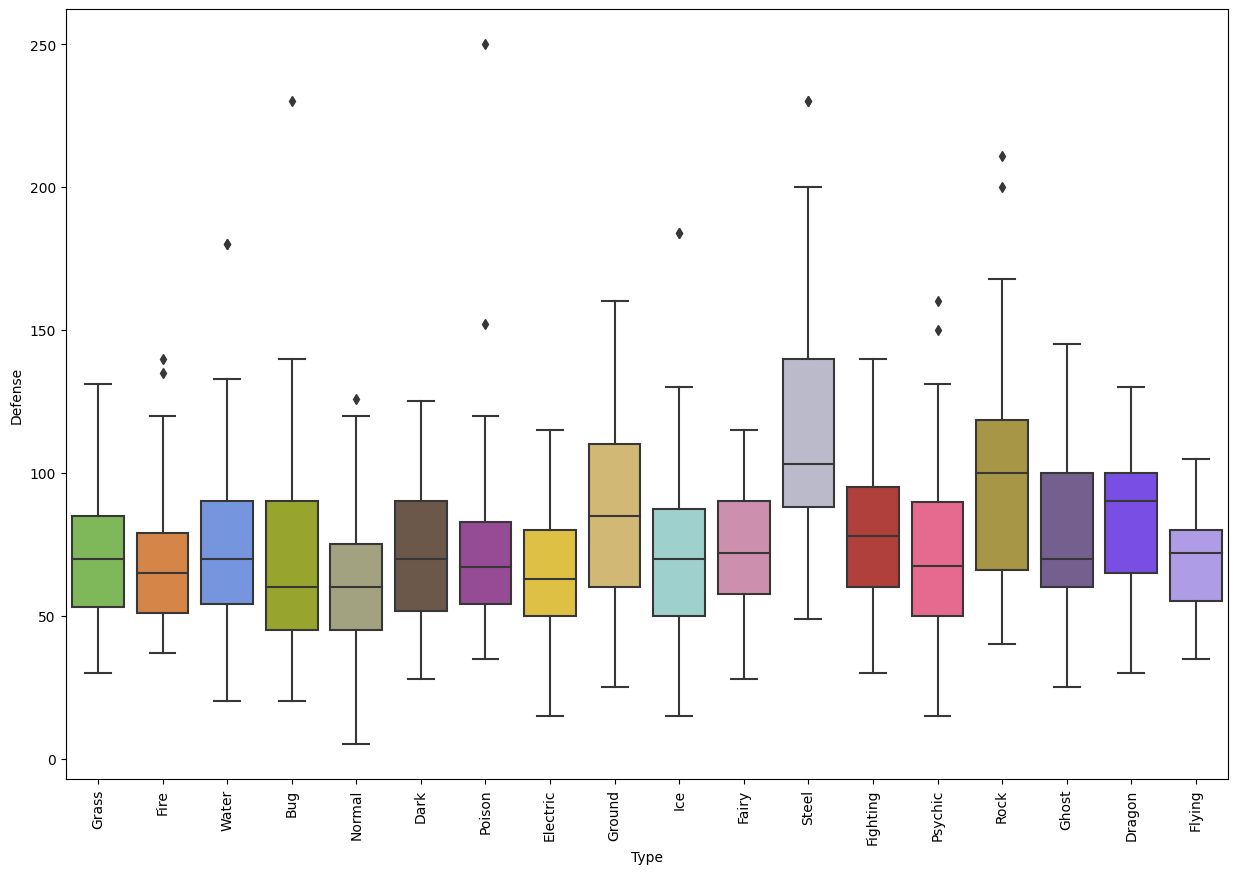

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Type', y='Defense', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()

Los pokemon de tipo acero y tipo roca son aquellos con una defensa más alta, lo que indica que son los más resistentes. Por otro lado, los pokemon de tipo bicho y normal son los que tienen una defensa más baja, lo que indica que son los menos resistentes frente a ataques.

### Ataque especial ###

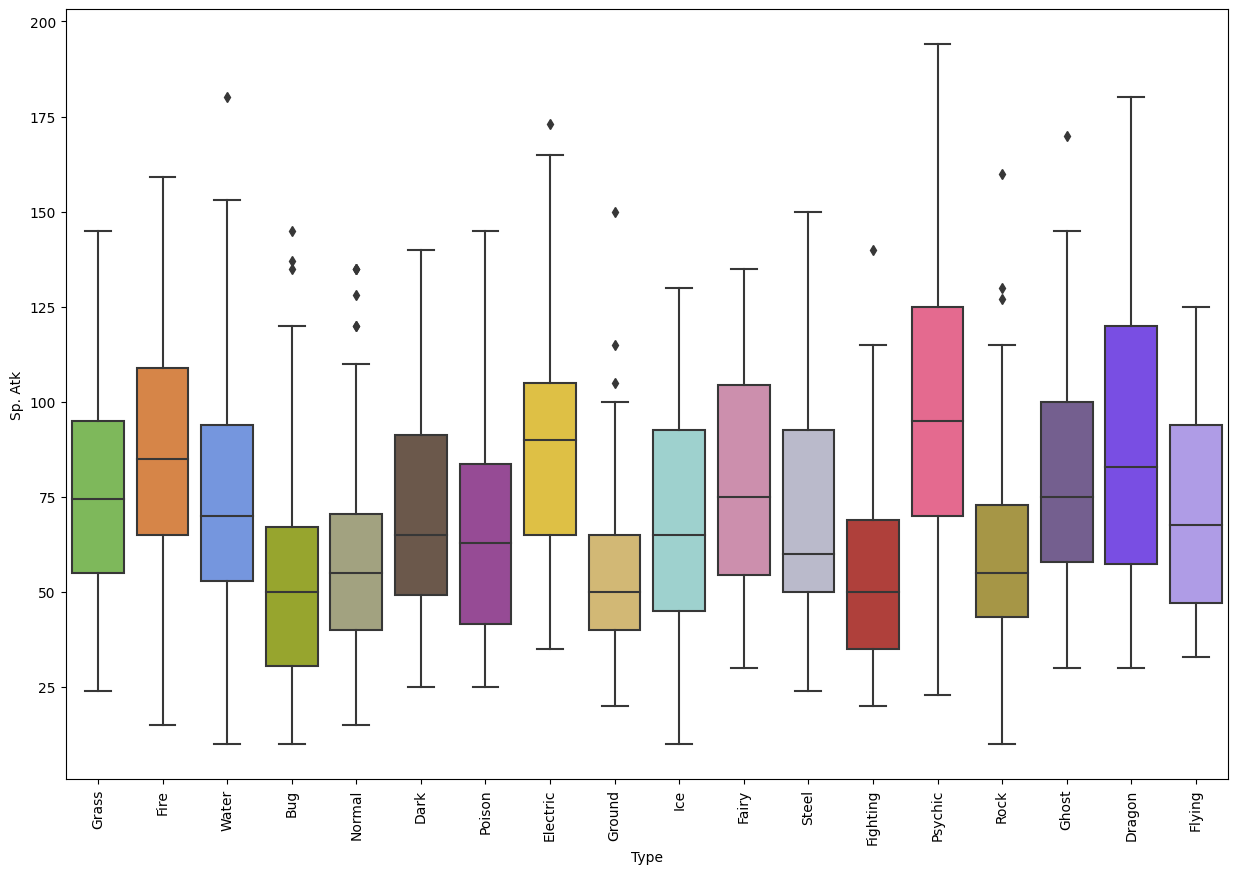

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Type', y='Sp. Atk', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()

Los pokemon de tipo dragon y tipo psiquico son aquellos con un ataque especial más alto. Por otro lado, los pokemon de tipo bicho tierra y pelea son los que tienen un ataque especial más bajo.

### Defensa especial ###

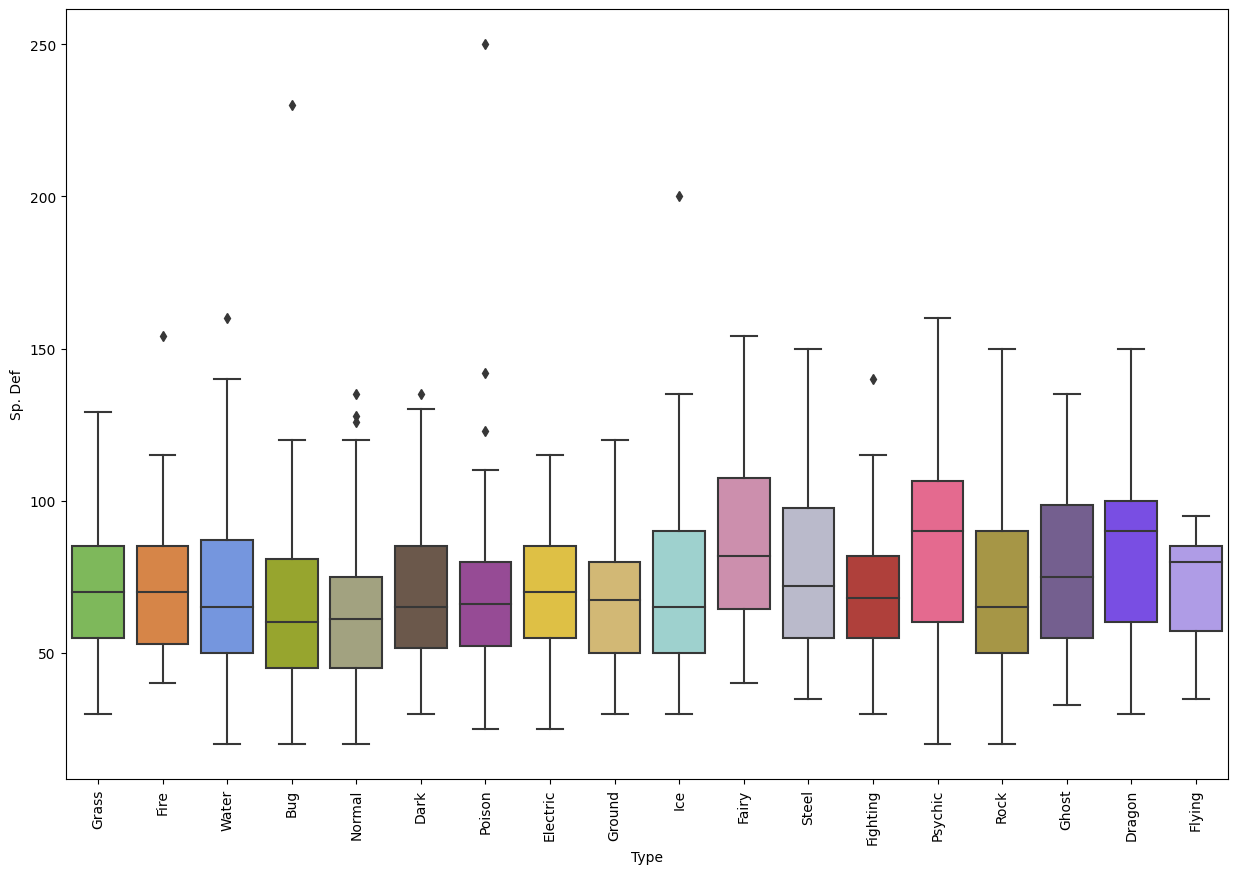

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Type', y='Sp. Def', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()

No se notan variaciones significativas en la defensa especial de los pokemon.

### Velocidad ###

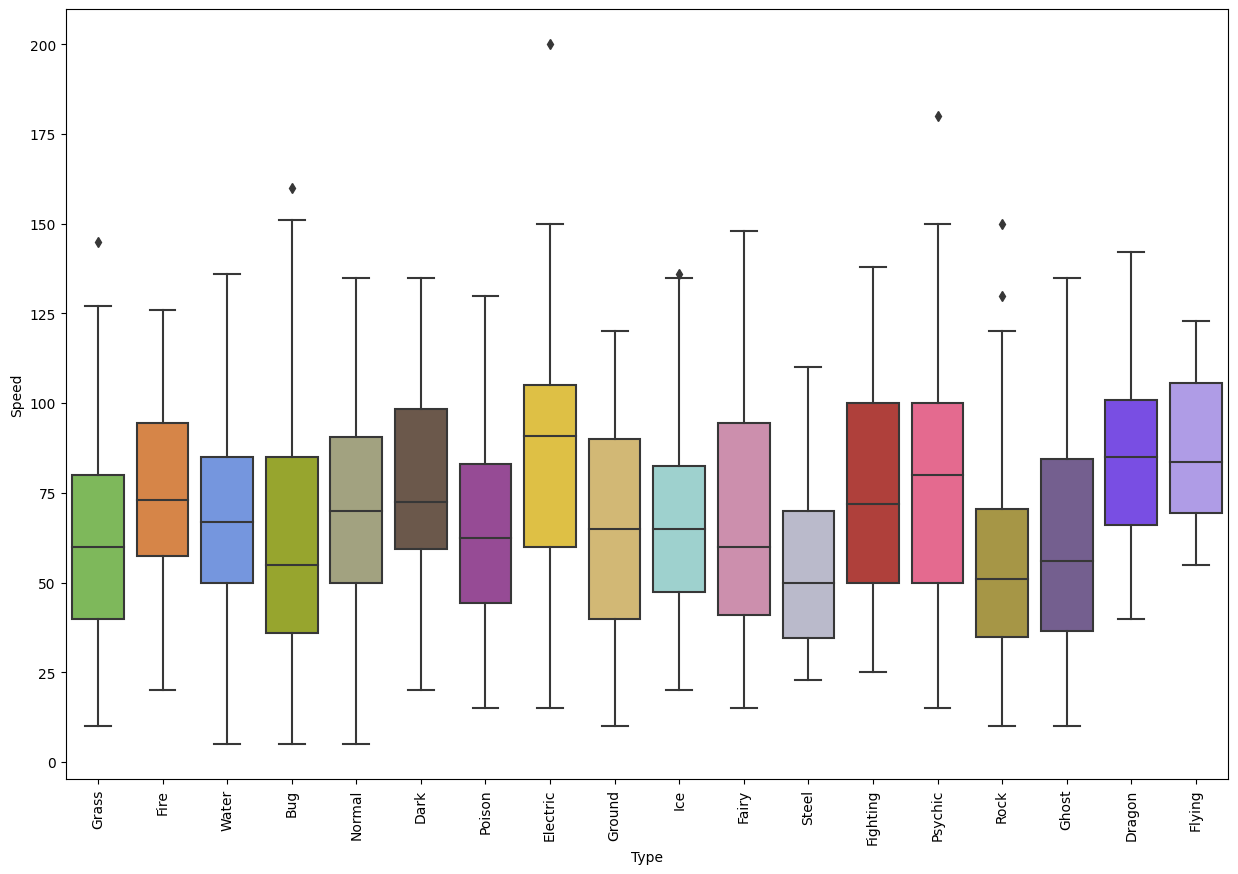

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Type', y='Speed', data=pokedex, palette=colors)
plt.xticks(rotation=90)
plt.show()

Los pokemon de tipo eléctrico son significativamente mas rápidos que el resto, mientras que en el extremo mas lento se encuentran los pokemon de tipo acero y roca.

## Árbol de decisión ##

In [13]:
x = np.array(pokedex[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
y = np.array(pokedex['Type'])
tree_clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, random_state=42)
tree_clf.fit(x, y)
dot_data=export_graphviz(tree_clf, out_file="pokemon.dot", 
                feature_names=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
                class_names=y, rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

TypeError: object of type 'NoneType' has no len()

In [ ]:
graph = Source( export_graphviz(tree_clf, out_file=None, feature_names=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']))
graph.format = 'png'
graph.render('dtree_render',view=True)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.313596 to fit


'dtree_render.png'